# Correspondence Evaluation Analysis
This notebook analyzes recall metrics for different DINOv2 model checkpoints evaluated on the NAVI_wild_all dataset.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import MaxNLocator


# Define column names explicitly
columns = [
    'timestamp', 'model', 'patch_size', 'layer', 'output_type', 'probe',
    'epochs', 'warmup', 'probe_lr', 'model_lr', 'batch_size',
    'train_dset', 'test_dset',
    # Scale-aware metrics (first set of 4)
    'SA_d1', 'SA_d2', 'SA_d3', 'SA_rmse',
    # Scale-invariant metrics (next set of 4)
    'SI_d1', 'SI_d2', 'SI_d3', 'SI_rmse'
]
# Read the CSV file without a header and assign column names
df = pd.read_csv('depth_results_NYUv2.log', header=None, names=columns)

# Extract training step from the model name
df['step'] = df['model'].str.extract(r'-(\d+)-')[0].astype(float)

# Sort by training step
df = df.sort_values(by='step')
# print(df.head())

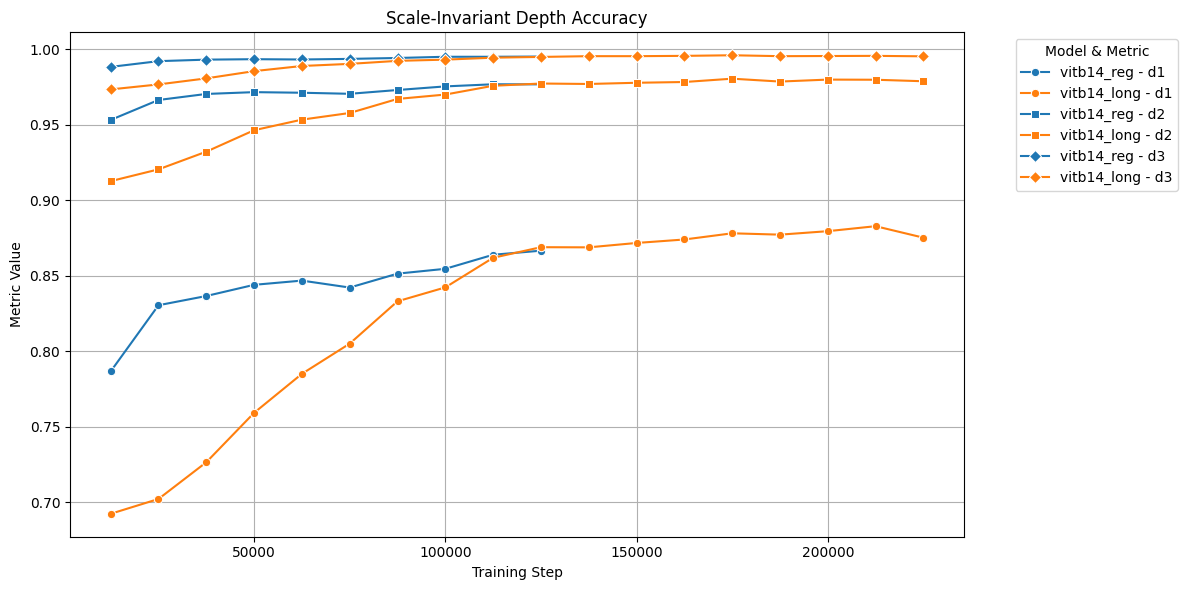

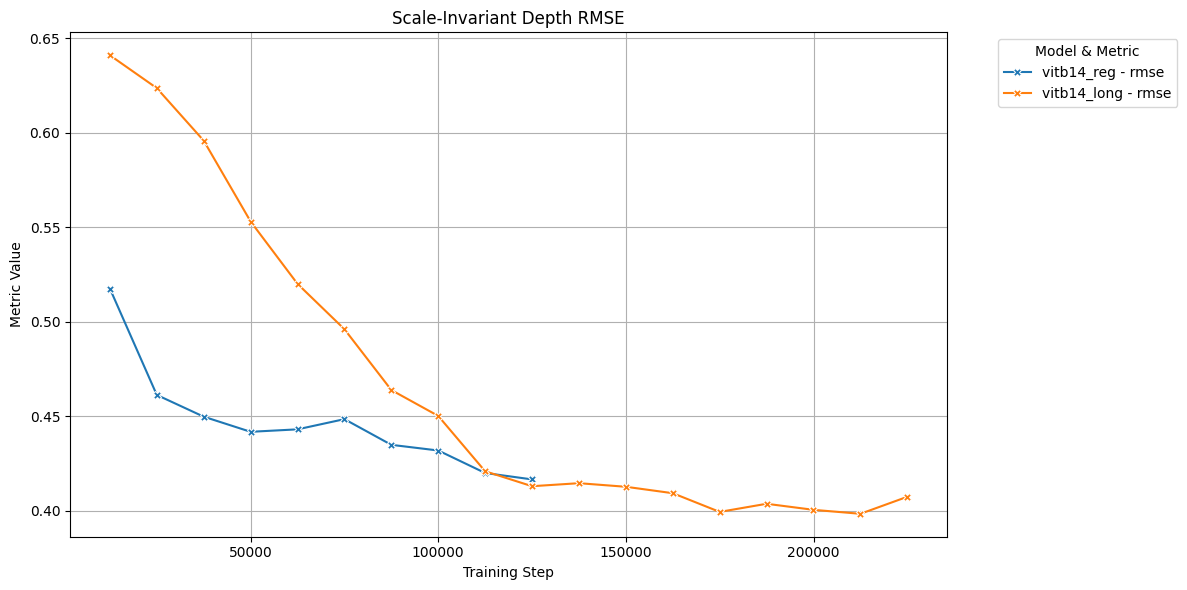

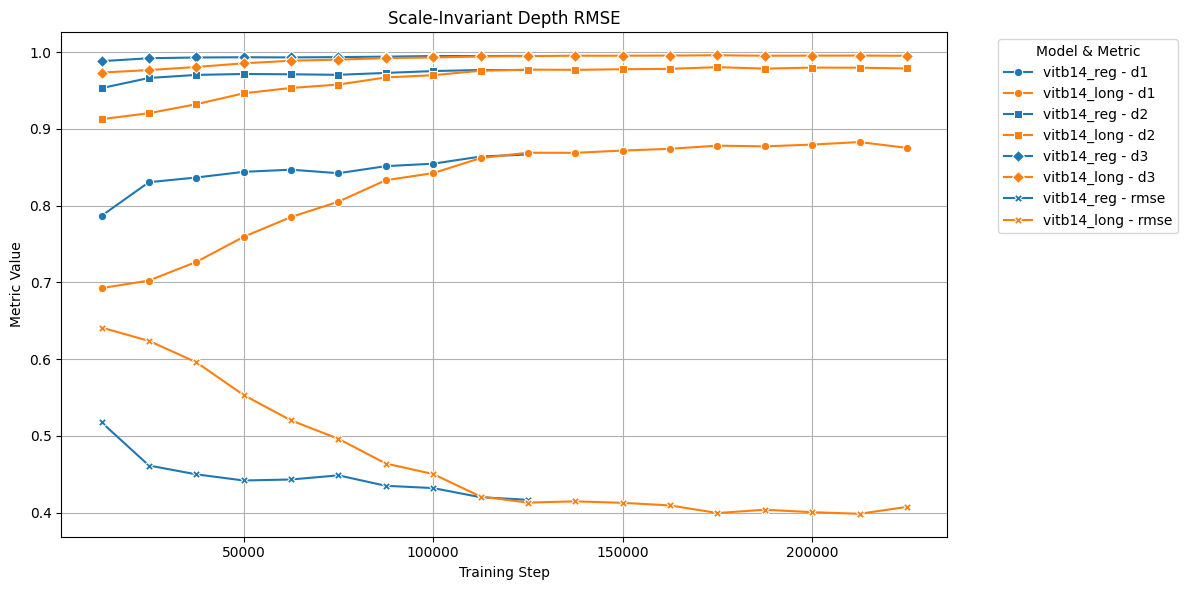

In [3]:
# Ensure consistent order
df_filtered = df[df['model'].str.contains('dinov2_vitb14_reg-outputs_b14|dinov2_vitb14-outputs_b14_long')].copy()
df_filtered['model_type'] = df_filtered['model'].apply(
    lambda x: 'vitb14_reg' if 'reg' in x else 'vitb14_long'
)

# Define consistent styles
model_palette = {
    'vitb14_reg': 'tab:blue',
    'vitb14_long': 'tab:orange'
}
marker_styles = {
    'd1': 'o',
    'd2': 's',
    'd3': 'D',
    'rmse': 'X'
}

# Plotting helper
def plot_depth_recall(df, metrics, prefix, title):
    plt.figure(figsize=(12, 6))
    for metric in metrics:
        full_metric = f"{prefix}_{metric}"
        for model_type in df['model_type'].unique():
            subset = df[df['model_type'] == model_type]
            sns.lineplot(
                data=subset,
                x='step',
                y=full_metric,
                label=f"{model_type} - {metric}",
                marker=marker_styles[metric],
                color=model_palette[model_type]
            )
    plt.title(title)
    plt.xlabel("Training Step")
    plt.ylabel("Metric Value")
    plt.grid(True)
    plt.legend(title='Model & Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Define your metrics
recall_metrics = ['d1', 'd2', 'd3', 'rmse']

# Plot scale-aware
# plot_depth_recall(df_filtered, recall_metrics, prefix="SA", title="Scale-Aware Depth Accuracy")

# Plot scale-invariant
plot_depth_recall(df_filtered, ['d1', 'd2', 'd3'], prefix="SI", title="Scale-Invariant Depth Accuracy")
plot_depth_recall(df_filtered, ['rmse'], prefix="SI", title="Scale-Invariant Depth RMSE")
plot_depth_recall(df_filtered, recall_metrics, prefix="SI", title="Scale-Invariant Depth RMSE")
